<a href="https://colab.research.google.com/github/Laaliji/Books_Recommandation_System/blob/main/systeme_recommandation_livres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Système de Recommandation de Livres basé sur le Clustering K-Means : Une Approche de Segmentation des Utilisateurs**

* Réalisé  par :
  * LAALIJI Zakariae
  * HNIOUA Abdessamad

* Encadré par :
  * M. BOUSHAKI

*Introduction*

Les systèmes de recommandation jouent un rôle crucial dans la personnalisation des expériences utilisateur, notamment dans des domaines comme le commerce électronique, les plateformes de streaming, ou les bibliothèques numériques. La problématique centrale de ce projet est de concevoir un système capable de recommander des livres pertinents à des utilisateurs en exploitant leurs évaluations passées, malgré des défis comme la sparsity (données manquantes) et la diversité des préférences. Nous proposons une solution basée sur le clustering K-Means, une méthode d'apprentissage automatique non supervisée, pour segmenter les utilisateurs en groupes homogènes selon leurs comportements de notation, puis générer des recommandations personnalisées à partir de ces groupes.

*Description de la Problématique*

La tâche consiste à recommander des livres à des utilisateurs à partir d'un ensemble de données hétérogènes et souvent incomplètes, comme le dataset Book-Crossing, qui contient environ 1,1 million d'évaluations de 278 000 utilisateurs sur 271 000 livres. Les principaux défis incluent la gestion de la sparsity (la plupart des utilisateurs n'évaluent qu'une fraction des livres), le problème du "cold start" pour les nouveaux utilisateurs ou livres, et la nécessité de capturer des préférences complexes sans recourir à des techniques de deep learning, conformément aux contraintes du projet. L'objectif est de produire des recommandations précises, pertinentes, et diversifiées tout en maintenant une approche interprétable et scalable.

*Motivation*

Résoudre cette problématique est essentiel pour améliorer l'expérience utilisateur sur des plateformes comme les librairies en ligne (par exemple, Amazon ou Goodreads). Un système de recommandation efficace augmente la satisfaction des utilisateurs, favorise la découverte de nouveaux contenus, et peut accroître les ventes ou l'engagement. Les défis techniques, tels que la gestion des données éparses et la segmentation précise des utilisateurs, rendent ce problème particulièrement intéressant d'un point de vue académique et pratique. De plus, l'utilisation d'une méthode comme K-Means permet d'explorer une approche simple mais puissante, qui peut être comparée à des techniques plus complexes de l'état de l'art.

*Domaine d'Application*

Ce système de recommandation trouve des applications dans plusieurs secteurs :

* *Commerce électronique* : Les librairies en ligne peuvent suggérer des livres adaptés aux goûts des clients, augmentant ainsi les ventes.
* *Bibliothèques numériques* : Les utilisateurs peuvent découvrir des livres pertinents dans de vastes catalogues.
* *Plateformes de lecture sociale* : Des sites comme Goodreads peuvent améliorer l'engagement en proposant des recommandations personnalisées.
* *Gestion d'inventaire* : Les recommandations permettent de prévoir la demande pour certains livres, optimisant les stocks.

*État de l'Art*

Plusieurs méthodes existent pour les systèmes de recommandation, chacune avec ses avantages et limitations :

* *Filtrage Collaboratif (Collaborative Filtering, CF)* : Cette méthode utilise les interactions utilisateur-objet (par exemple, évaluations) pour identifier des utilisateurs ou des objets similaires. Avantages : Efficace avec des données suffisantes, capture bien les préférences implicites. Limitations : Souffre du problème du "cold start" et de la sparsity, rendant les recommandations moins précises pour les nouveaux utilisateurs ou objets.

* *Filtrage Basé sur le Contenu (Content-Based Filtering, CBF)* : Recommande des objets en fonction de leurs caractéristiques (par exemple, genres ou auteurs des livres). Avantages : Gère bien les nouveaux objets, ne dépend pas des données d'autres utilisateurs. Limitations : Dépend fortement de la qualité des caractéristiques et peut conduire à une sur-spécialisation (recommandations trop similaires).

* *Factorisation de Matrices (Matrix Factorization, MF)* : Décompose la matrice utilisateur-objet en facteurs latents pour prédire les évaluations manquantes. Avantages : Gère bien la sparsity, offre une grande précision. Limitations : Coût computationnel élevé, nécessite un réglage fin des hyperparamètres.

* *Méthodes Basées sur le Clustering* : Groupent les utilisateurs ou objets similaires (par exemple, via K-Means). Avantages : Scalable, interprétable, et adapté aux grands ensembles de données. Limitations : Sensible à l'initialisation et peut simplifier à l'excès les préférences complexes.

Dans ce projet, nous optons pour une approche basée sur K-Means pour segmenter les utilisateurs selon leurs évaluations, en exploitant les datasets Book-Crossing et MovieLens 1M pour évaluer la généralisation. Cette méthode sera comparée aux approches de l'état de l'art, avec une analyse quantitative et qualitative des performances.

## **Préparation de l'environnement**

Cette section configure l'environnement Google Colab pour le projet de système de recommandation. Elle inclut l'installation des packages nécessaires, l'importation des bibliothèques, le montage de Google Drive pour accéder aux données, et la configuration de la graine aléatoire pour la reproductibilité.

In [2]:
# Importation des bibliothèques standard pour la manipulation des données et les opérations numériques
import pandas as pd  # Pour gérer les datasets sous forme de DataFrames
import numpy as np   # Pour les opérations numériques et la gestion des tableaux

# Importation des modules scikit-learn pour les tâches d'apprentissage automatique
from sklearn.cluster import KMeans  # Pour le clustering K-Means
from sklearn.decomposition import PCA  # Pour la réduction de dimensionnalité
from sklearn.metrics import precision_score, recall_score, mean_absolute_error  # Pour les métriques d'évaluation
from sklearn.model_selection import KFold  # Pour la validation croisée
from sklearn.metrics.pairwise import cosine_distances  # Pour calculer la métrique de diversité
import seaborn as sns
from scipy.sparse import csr_matrix

# Importation de scipy pour les opérations sur matrices creuses
from scipy.sparse import csr_matrix  # Pour une représentation efficace des matrices creuses

# Importation de matplotlib pour la visualisation
import matplotlib.pyplot as plt  # Pour tracer les visualisations des clusters

# Montage de Google Drive pour accéder au dataset
# On suppose que le dataset est stocké dans '/content/drive/My Drive/books_data'
from google.colab import drive
drive.mount('/content/drive')  # Monte Google Drive ; suivez l'invite d'authentification

# Définition du chemin de base pour le dataset Book-Crossing
# Mettez à jour ce chemin si votre dataset est stocké dans un répertoire différent
base_path = '/content/drive/My Drive/books_data/'

# Chargement des fichiers du dataset
# Ces fichiers contiennent les évaluations des utilisateurs, les métadonnées des livres et les informations des utilisateurs
# Utilisation de l'encodage 'latin-1' et gestion des lignes incorrectes pour éviter les erreurs de formatage
try:
    books_df = pd.read_csv(base_path + 'books.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
    ratings_df = pd.read_csv(base_path + 'ratings.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
    users_df = pd.read_csv(base_path + 'users.csv', sep=';', encoding='latin-1', on_bad_lines='skip')

except FileNotFoundError:
    print("Erreur : Fichiers du dataset non trouvés. Vérifiez le base_path et assurez-vous que les fichiers existent.")

# Configuration de la graine aléatoire pour la reproductibilité
# Cela garantit des résultats cohérents entre les exécutions pour K-Means et le fractionnement des données
np.random.seed(42)

# Vérification du chargement des datasets en affichant les premières lignes
print("\nEchantillons du dataset Books")
print(books_df.head())
print("\nEchantillons du dataset Ratings")
print(ratings_df.head())
print("\nEchantillons du dataset Users")
print(users_df.head())

Mounted at /content/drive


<ipython-input-2-424948c766bf>:33: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(base_path + 'books.csv', sep=';', encoding='latin-1', on_bad_lines='skip')



Echantillons du dataset Books
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0... 

## **Exploration des Données (EDA)**

### Analyse des Statistiques Descriptives

In [3]:
print("\n=== Analyse du Nouveau Dataset ===")

# Taille des fichiers
print("\nTaille des fichiers :")
print(f"Livres (books.csv) : {books_df.shape[0]} lignes, {books_df.shape[1]} colonnes")
print(f"Évaluations (ratings.csv) : {ratings_df.shape[0]} lignes, {ratings_df.shape[1]} colonnes")
print(f"Utilisateurs (users.csv) : {users_df.shape[0]} lignes, {users_df.shape[1]} colonnes")

# Statistiques des évaluations (Book-Rating)
print("\nStatistiques des évaluations (Book-Rating) :")
print(ratings_df['Book-Rating'].describe())
print(f"Nombre d'évaluations nulles (0) : {len(ratings_df[ratings_df['Book-Rating'] == 0])}")
print(f"Pourcentage d'évaluations nulles : {(len(ratings_df[ratings_df['Book-Rating'] == 0]) / ratings_df.shape[0] * 100):.2f}%")

# Nombre d'utilisateurs et de livres uniques
unique_users = ratings_df['User-ID'].nunique()
unique_books = ratings_df['ISBN'].nunique()
print(f"\nNombre d'utilisateurs uniques : {unique_users}")
print(f"Nombre de livres uniques : {unique_books}")

# Calcul de la sparsity
total_possible_ratings = unique_users * unique_books
actual_ratings = ratings_df.shape[0]
sparsity = 1 - (actual_ratings / total_possible_ratings)
print(f"Sparsity du dataset : {sparsity:.4f} (seulement {(1-sparsity)*100:.4f}% des évaluations possibles sont présentes)")


=== Analyse du Nouveau Dataset ===

Taille des fichiers :
Livres (books.csv) : 271360 lignes, 8 colonnes
Évaluations (ratings.csv) : 1149780 lignes, 3 colonnes
Utilisateurs (users.csv) : 278858 lignes, 3 colonnes

Statistiques des évaluations (Book-Rating) :
count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64
Nombre d'évaluations nulles (0) : 716109
Pourcentage d'évaluations nulles : 62.28%

Nombre d'utilisateurs uniques : 105283
Nombre de livres uniques : 340556
Sparsity du dataset : 1.0000 (seulement 0.0032% des évaluations possibles sont présentes)


### Visualisations

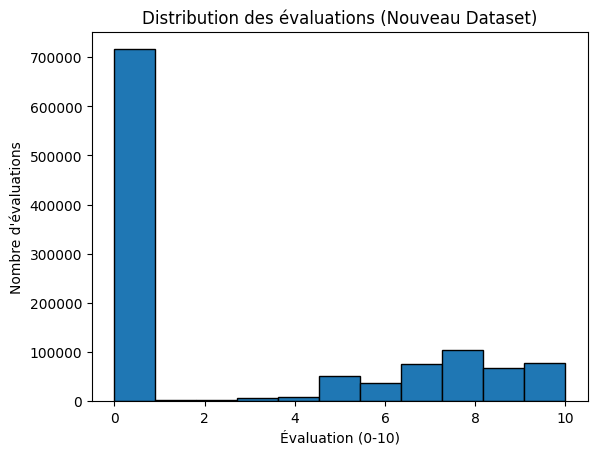

In [4]:
# --- Distribution des évaluations ---
plt.figure()
plt.hist(ratings_df['Book-Rating'], bins=11, edgecolor='black')
plt.title("Distribution des évaluations (Nouveau Dataset)")
plt.xlabel("Évaluation (0-10)")
plt.ylabel("Nombre d'évaluations")
plt.show()

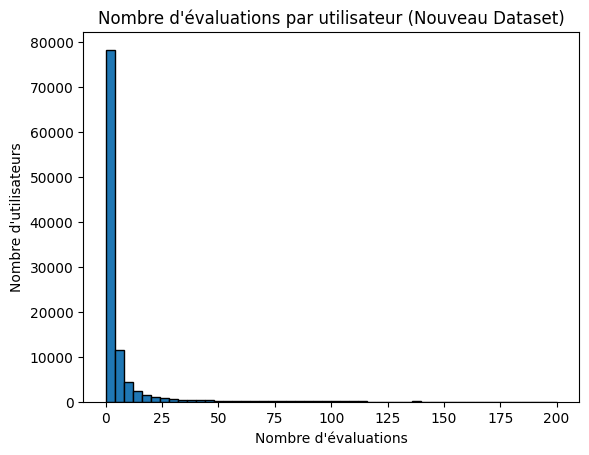

In [5]:
# --- Nombre d'évaluations par utilisateur ---
user_rating_counts = ratings_df['User-ID'].value_counts()
plt.figure()
plt.hist(user_rating_counts, bins=50, range=(0, 200), edgecolor='black')  # Limité à 200 pour lisibilité
plt.title("Nombre d'évaluations par utilisateur (Nouveau Dataset)")
plt.xlabel("Nombre d'évaluations")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

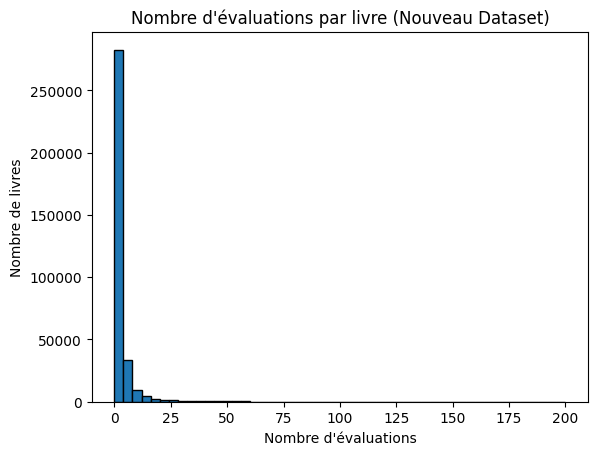

In [8]:
# --- Nombre d'évaluations par livre ---
book_rating_counts = ratings_df['ISBN'].value_counts()
plt.figure()
plt.hist(book_rating_counts, bins=50, range=(0, 200), edgecolor='black')  # Limité à 200 pour lisibilité
plt.title("Nombre d'évaluations par livre (Nouveau Dataset)")
plt.xlabel("Nombre d'évaluations")
plt.ylabel("Nombre de livres")
plt.show()

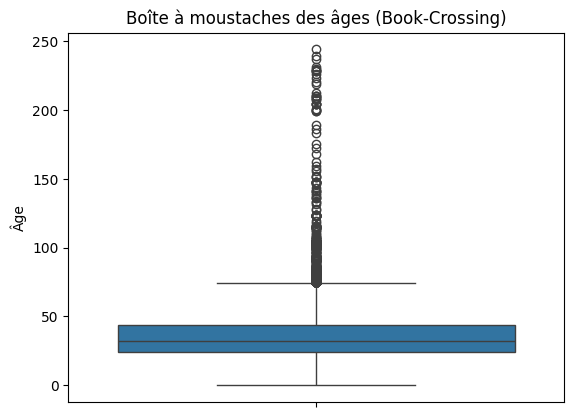

In [10]:
# --- Visualisation des âges pour détecter les aberrations ---
plt.figure()
sns.boxplot(y=users_df['Age'].dropna())  # Exclure les NaN pour la boxplot
plt.title("Boîte à moustaches des âges (Book-Crossing)")
plt.ylabel("Âge")
plt.show()

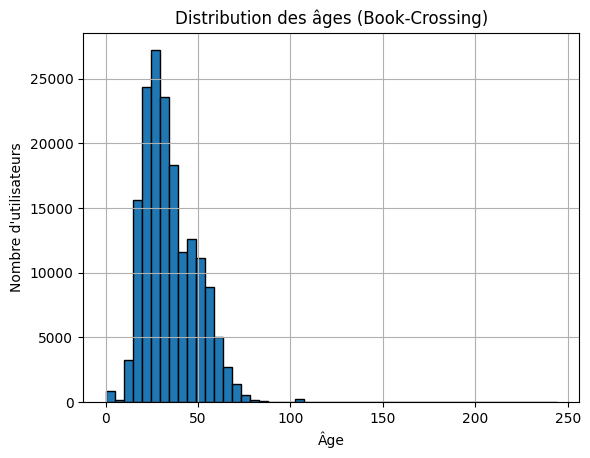

In [11]:
# --- Distribution des âges pour vérifier l'équilibre ---
plt.figure()
users_df['Age'].dropna().hist(bins=50, edgecolor='black')
plt.title("Distribution des âges (Book-Crossing)")
plt.xlabel("Âge")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Détection des Données Aberrantes

In [12]:
print("\n=== Détection des Données Aberrantes ===")
# Âges aberrants (>100 ans)
outlier_ages = users_df[users_df['Age'] > 100]['Age'].count()
print(f"Nombre d'âges aberrants (>100 ans) : {outlier_ages}")
print(f"Exemples d'âges aberrants :")
print(users_df[users_df['Age'] > 100]['Age'].head())


=== Détection des Données Aberrantes ===
Nombre d'âges aberrants (>100 ans) : 366
Exemples d'âges aberrants :
1288    103.0
1322    104.0
1578    231.0
3084    104.0
3210    119.0
Name: Age, dtype: float64


In [13]:
# Évaluations aberrantes (valeurs négatives ou >10)
outlier_ratings = ratings_df[(ratings_df['Book-Rating'] < 0) | (ratings_df['Book-Rating'] > 10)]['Book-Rating'].count()
print(f"\nNombre d'évaluations aberrantes (<0 ou >10) : {outlier_ratings}")


Nombre d'évaluations aberrantes (<0 ou >10) : 0


### Vérification de l'Équilibre des Données


=== Vérification de l'Équilibre des Données ===


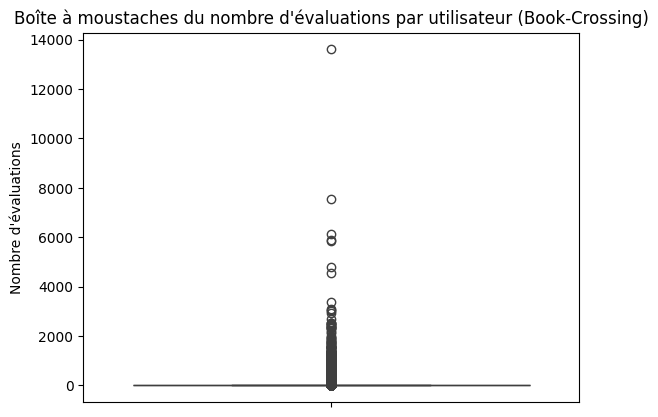

In [14]:
print("\n=== Vérification de l'Équilibre des Données ===")
# Distribution des évaluations par utilisateur (boxplot pour détecter les déséquilibres)
plt.figure()
sns.boxplot(y=user_rating_counts)
plt.title("Boîte à moustaches du nombre d'évaluations par utilisateur (Book-Crossing)")
plt.ylabel("Nombre d'évaluations")
plt.show()

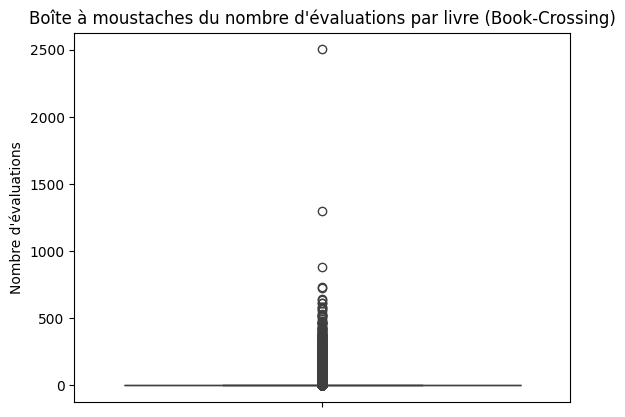

In [15]:
# Distribution des évaluations par livre (boxplot)
plt.figure()
sns.boxplot(y=book_rating_counts)
plt.title("Boîte à moustaches du nombre d'évaluations par livre (Book-Crossing)")
plt.ylabel("Nombre d'évaluations")
plt.show()

### Analyse des Données Manquantes et Qualité

In [7]:
print("Valeurs manquantes dans books.csv :")
print(books_df.isnull().sum())
print("\nValeurs manquantes dans ratings.csv :")
print(ratings_df.isnull().sum())
print("\nValeurs manquantes dans users.csv :")
print(users_df.isnull().sum())

# Analyse spécifique des âges
print("\nStatistiques des âges des utilisateurs :")
print(users_df['Age'].describe())
print(f"Pourcentage d'âges manquants : {users_df['Age'].isnull().mean()*100:.2f}%")

# Vérification des valeurs aberrantes dans les âges
outlier_ages = users_df[users_df['Age'] > 100]['Age'].count()
print(f"Nombre d'âges aberrants (>100 ans) : {outlier_ages}")

Valeurs manquantes dans books.csv :
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Valeurs manquantes dans ratings.csv :
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Valeurs manquantes dans users.csv :
User-ID          0
Location         0
Age         110762
dtype: int64

Statistiques des âges des utilisateurs :
count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64
Pourcentage d'âges manquants : 39.72%
Nombre d'âges aberrants (>100 ans) : 366


### Détection des Doublons

In [16]:
print("\n=== Détection des Doublons ===")
# Doublons dans ratings.csv (basés sur User-ID, ISBN, Book-Rating)
duplicates_ratings = ratings_df.duplicated(subset=['User-ID', 'ISBN', 'Book-Rating']).sum()
print(f"Nombre de doublons dans ratings.csv : {duplicates_ratings}")
if duplicates_ratings > 0:
    print("Exemples de doublons dans ratings.csv :")
    print(ratings_df[ratings_df.duplicated(subset=['User-ID', 'ISBN', 'Book-Rating'], keep=False)].head())

# Doublons dans books.csv (basés sur ISBN)
duplicates_books = books_df.duplicated(subset=['ISBN']).sum()
print(f"\nNombre de doublons dans books.csv : {duplicates_books}")
if duplicates_books > 0:
    print("Exemples de doublons dans books.csv :")
    print(books_df[books_df.duplicated(subset=['ISBN'], keep=False)].head())

# Doublons dans users.csv (basés sur User-ID)
duplicates_users = users_df.duplicated(subset=['User-ID']).sum()
print(f"\nNombre de doublons dans users.csv : {duplicates_users}")
if duplicates_users > 0:
    print("Exemples de doublons dans users.csv :")
    print(users_df[users_df.duplicated(subset=['User-ID'], keep=False)].head())


=== Détection des Doublons ===
Nombre de doublons dans ratings.csv : 0

Nombre de doublons dans books.csv : 0

Nombre de doublons dans users.csv : 0


## **Préparation des données**

In [33]:
# --- Section de Prétraitement des Données ---
# Cette section nettoie et prépare le dataset Book-Crossing pour le clustering K-Means.
# Les étapes incluent : filtrage des utilisateurs et livres peu actifs, gestion des évaluations nulles,
# nettoyage des âges aberrants, et construction d'une matrice utilisateur-livre.

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

# 1. Filtrage des Utilisateurs et Livres Peu Actifs
min_user_ratings = 5  # Seuil minimum d'évaluations par utilisateur
min_book_ratings = 5  # Seuil minimum d'évaluations par livre

# Calcul des comptes d'évaluations
user_counts = ratings_df['User-ID'].value_counts()
book_counts = ratings_df['ISBN'].value_counts()

# Filtrer les utilisateurs et livres respectant les seuils
valid_users = user_counts[user_counts >= min_user_ratings].index
valid_books = book_counts[book_counts >= min_book_ratings].index
filtered_ratings = ratings_df[ratings_df['User-ID'].isin(valid_users) &
                             ratings_df['ISBN'].isin(valid_books)].copy()

print(f"\nNombre d'utilisateurs après filtrage : {len(valid_users)}")
print(f"Nombre de livres après filtrage : {len(valid_books)}")
print(f"Nombre d'évaluations restantes : {filtered_ratings.shape[0]}")

# 2. Gestion des Évaluations Nulles (0)
# Exclure les évaluations nulles (0) pour ne conserver que les préférences explicites
filtered_ratings = filtered_ratings[filtered_ratings['Book-Rating'] > 0].copy()
print(f"Nombre d'évaluations après exclusion des 0 : {filtered_ratings.shape[0]}")

# Normaliser les évaluations (0-10) à une échelle 0-1
filtered_ratings['Book-Rating'] = filtered_ratings['Book-Rating'] / 10.0

# 3. Nettoyage des Âges Aberrants (Optionnel)
# Si vous souhaitez utiliser l'âge dans le clustering, nous pouvons nettoyer ici
# Caper les âges à 100 ans et imputer les valeurs manquantes par la médiane
users_df['Age'] = users_df['Age'].fillna(users_df['Age'].median())  # Imputation par la médiane (32)
users_df['Age'] = users_df['Age'].clip(upper=100)  # Limiter à 100 ans
print("\nStatistiques des âges après nettoyage :")
print(users_df['Age'].describe())

# 4. Construction de la Matrice Utilisateur-Livre
# Créer une matrice creuse
user_ids = filtered_ratings['User-ID'].unique()
book_ids = filtered_ratings['ISBN'].unique()

user_map = {id: idx for idx, id in enumerate(user_ids)}
book_map = {id: idx for idx, id in enumerate(book_ids)}

row = filtered_ratings['User-ID'].map(user_map)
col = filtered_ratings['ISBN'].map(book_map)
data = filtered_ratings['Book-Rating']

user_item_matrix = csr_matrix((data, (row, col)), shape=(len(user_ids), len(book_ids)))
print(f"\nTaille de la matrice utilisateur-livre : {user_item_matrix.shape}")
print(f"Nombre d'éléments non nuls : {user_item_matrix.nnz}")

# 5. Normalisation des Données (Optionnel)
# Si vous souhaitez utiliser PCA ou normaliser davantage, convertissez en matrice dense
# Ici, nous utiliserons la matrice creuse directement pour K-Means

# Sauvegarder les données prétraitées pour la suite
preprocessed_data = {
    'filtered_ratings': filtered_ratings,
    'users_df': users_df,
    'books_df': books_df,
    'user_item_matrix': user_item_matrix,
    'user_map': user_map,
    'book_map': book_map
}

# --- Fin de la Section de Prétraitement des Données ---


Nombre d'utilisateurs après filtrage : 22816
Nombre de livres après filtrage : 43765
Nombre d'évaluations restantes : 623405
Nombre d'évaluations après exclusion des 0 : 216981

Statistiques des âges après nettoyage :
count    278858.000000
mean         33.634093
std          11.053986
min           0.000000
25%          29.000000
50%          32.000000
75%          35.000000
max         100.000000
Name: Age, dtype: float64

Taille de la matrice utilisateur-livre : (20072, 39795)
Nombre d'éléments non nuls : 216981
